In [1]:
import dask
from dask import dataframe
from dask import array

import numpy as np

import matplotlib.pyplot as plt

## Dataframes

In [2]:
df = dataframe.read_csv("./data/archive/artificialWithAnomaly/artificialWithAnomaly/art_daily_jumpsup.csv", blocksize="40kb")
df = df.set_index("timestamp")

In [3]:
df.npartitions

3

In [4]:
df.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [5]:
df.shape

(Delayed('int-354dc12a-0b85-4f8b-8ad2-ea9023037c75'), 1)

In [6]:
len(df)

4032

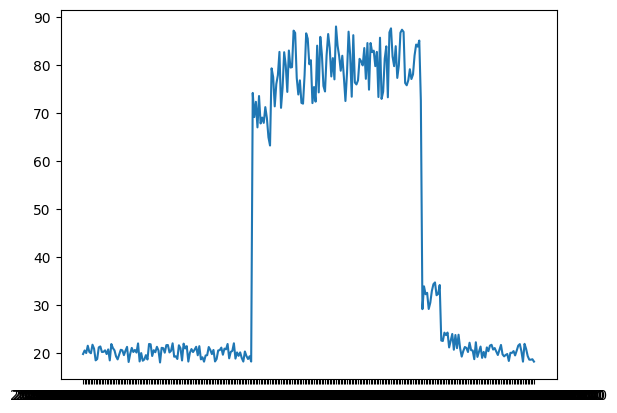

In [7]:
plt.plot(df.loc[df.index.compute()[:288]].compute())

In [8]:
df.max().compute()

value    164.947481
dtype: float64

## Arrays

In [9]:
matrix = array.random.normal(0, 1, size=(6*2016, 4*2016)).astype('float64')

In [10]:
matrix = matrix - matrix.mean(axis=1).compute()[:, None]

In [11]:
matrix.mean(axis=1).compute()

array([ 3.52451754e-18,  1.23358114e-17, -7.04903508e-18, ...,
        2.20282346e-17,  2.29093640e-17,  1.76225877e-18])

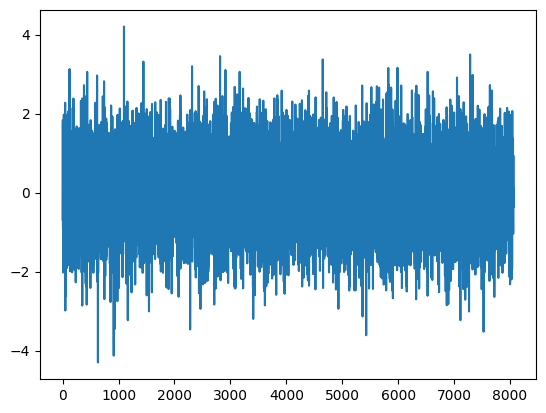

In [12]:
plt.plot(matrix[0, :])

In [24]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(abs(x).max().compute(), abs(y).max().compute())
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x.compute(), bins=bins)
    ax_histy.hist(y.compute(), bins=bins, orientation='horizontal')

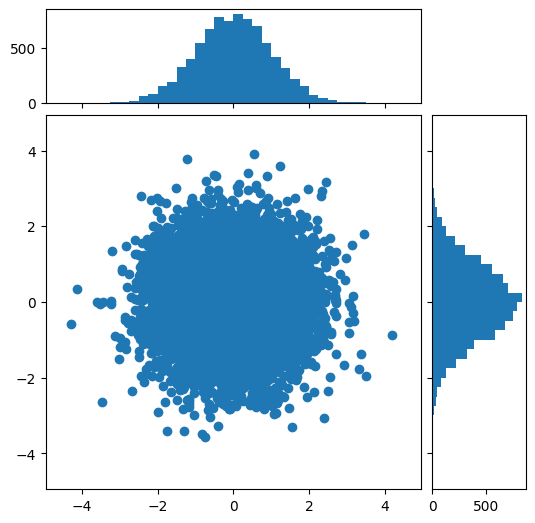

In [26]:
# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(matrix[0, :], matrix[1, :], ax, ax_histx, ax_histy)